<a href="https://colab.research.google.com/github/kleimenova/gtkstudy/blob/main/TP4b_project_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Read this before continuing
This notebook uses `condacolab` package, which simplifies instalation and setup of `ROOT` package. Unfortunately the `condacolab` commands need to be run as the first Code cell!

Once you run `condacolab.install()`, the Python kernel will be restarted. This is normal and expected. After that, you can continue running the cells below like normal.

Do not use the `Run all` option. Run the `condacolab` cell individually and wait for the kernel to restart. Only then, you can run all cells if you want.

In [1]:
# Load the Drive helper and mount
# Do it once
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!pip install -q condacolab
import condacolab
condacolab.install()

⏬ Downloading https://github.com/jaimergp/miniforge/releases/latest/download/Mambaforge-colab-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:30
🔁 Restarting kernel...


In [1]:
!conda install -c conda-forge root

Solving environment: | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / failed with initial frozen solve. Retrying with flexible solve.
Solving environment: - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ 

In [3]:
!pip install -q uproot
!pip install -q tensorflow==2.6.2 #specific versions for compatability with zfit
!pip install -q zfit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 328.4/328.4 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 583.2/583.2 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 458.4/458.4 MB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 54.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.9/14.9 MB 53.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 52.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 45.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

# GTK performance study

In [80]:
import numpy as np
import uproot
import pandas as pd
import matplotlib.pyplot as pl
import matplotlib.colors as mcolors
import copy
import ROOT

In [5]:
# This is just how I like quickly setup plots, change to whatever you like:
colormap = copy.copy(pl.cm.get_cmap("viridis")) # rainbow
colormap.set_under('w',1)

textsize=18
plotw=10
ploth=8

pl.rc('xtick',labelsize=textsize)
pl.rc('ytick',labelsize=textsize)
pl.rc('axes', linewidth = 2)

### NA62 Run 1, Run 9001

In [6]:
# Set file path as in your setup:
FilePath="/content/drive/MyDrive/TP4b/Data/Run009001_gtk_tp4b_1802.root"
myFile = ROOT.TFile.Open(FilePath)
myTree = myFile.GTKStudyTtree
# Don't mind warnings, they are related to the NA62FW ROOT dictionary, which we don't have setup here

Warning in <TClass::Init>: no dictionary for class Stream is available
Warning in <TClass::Init>: no dictionary for class RecoInfo is available
Warning in <TClass::Init>: no dictionary for class AnalysisInfo is available
Warning in <TClass::Init>: no dictionary for class CheckPointInfo is available
Warning in <TClass::Init>: no dictionary for class NA62Analysis::Core::AnalyzerIdentifier is available
Warning in <TClass::Init>: no dictionary for class MCInfo is available
Warning in <TClass::Init>: no dictionary for class BeamLineInfo is available


In [7]:
# Check the branches:
myTree.Show(0)

======> EVENT:0
 RunID           = 9001
 BurstID         = 1
 EventID         = 10059
 EventTS         = 49486261
 InstantaneousIntensity = 185.185
 K3piVertex_x    = 53.7267
 K3piVertex_y    = 2.73911
 K3piVertex_z    = 141683
 K3piVertex_t    = 17.9379
 K3piKTAG_t      = 17.8034
 K3piKTAG_nsectors = 6
 K3piTotalMom_Px = 93.6885
 K3piTotalMom_Py = 1.32014
 K3piTotalMom_Pz = 75818.8
 K3piVertexGTK3_x = 5.24355
 K3piVertexGTK3_y = 2.08316
 K3piVertexGTK3_z = 102400
 K3piTotalMomGTK3_Px = 93.4278
 K3piTotalMomGTK3_Py = 1.29883
 K3piTotalMomGTK3_Pz = 75818.8
 GTKTrackGTK3_x  = (vector<float>*)0xab80a00
 GTKTrackGTK3_y  = (vector<float>*)0xabab270
 GTKTrack_t      = (vector<float>*)0xab947f0
 GTKTrack_Px     = (vector<float>*)0xab83140
 GTKTrack_Py     = (vector<float>*)0xa2ee8a0
 GTKTrack_Pz     = (vector<float>*)0xab930c0
 GTKTrack_chi2   = (vector<float>*)0xab4c2e0
 GTKTrack_nhits  = (vector<float>*)0xabcc480
 GTKHit_x        = (vector<float>*)0xab8e020
 GTKHit_y        = (vector<float>

In [8]:
# Took me 25' on google collabs..
# fill dx, dy, dt, dPx, dPy, dPz:
dx=[]
dy=[]
dt=[]
dPx=[]
dPy=[]
dPz=[]
for entry in myTree:
    for x,y,t,px,py,pz in zip(entry.GTKTrackGTK3_x, entry.GTKTrackGTK3_y, entry.GTKTrack_t, entry.GTKTrack_Px, entry.GTKTrack_Py, entry.GTKTrack_Pz):

        if np.abs(t-entry.K3piKTAG_t)>1:
            continue
        
        dx.append(x-entry.K3piVertexGTK3_x)
        dy.append(y-entry.K3piVertexGTK3_y)
        dt.append(t-entry.K3piKTAG_t)
        dPx.append(px-entry.K3piTotalMom_Px)
        dPy.append(py-entry.K3piTotalMom_Py)
        dPz.append(pz-entry.K3piTotalMom_Pz)
        

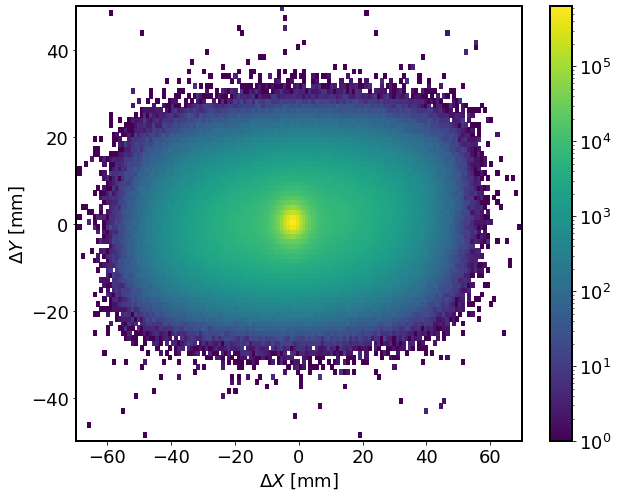

In [9]:
# Vertex position vs GTK track position @ GTK3
fig, ax= pl.subplots(figsize=(plotw,ploth))

h = ax.hist2d(dx, dy, bins=[300, 300], cmap=colormap, norm=mcolors.LogNorm())
ax.set_xlabel(r'$\Delta X$ [mm]', fontsize=textsize)
ax.set_ylabel(r'$\Delta Y$ [mm]', fontsize=textsize)

ax.set_xlim(-70, 70)
ax.set_ylim(-50, 50)

pl.colorbar(h[3], ax=ax)  # show color scale

In [10]:
import zfit

/usr/local/lib/python3.8/site-packages/zfit/__init__.py:62: UserWarning: TensorFlow warnings are by default suppressed by zfit. In order to show them, set the environment variable ZFIT_DISABLE_TF_WARNINGS=0. In order to suppress the TensorFlow warnings AND this warning, set ZFIT_DISABLE_TF_WARNINGS=1.
  warnings.warn(


In [56]:
all_params = {}

def get_param(name, value=None, lower=None, upper=None, step_size=None, **kwargs):
    """Either create a parameter or return existing if a parameter with this name already exists.

    If anything else than *name* is given, this will be used to change the existing parameter.

    Args:
        name: Name of the Parameter
        value : starting value
        lower : lower limit
        upper : upper limit
        step_size : step size

    Returns:
        ``zfit.Parameter``
    """
    if name in all_params:
        parameter = all_params[name]
        if lower is not None:
            parameter.lower = lower
        if upper is not None:
            parameter.upper = upper
        if step_size is not None:
            parameter.step_size = step_size
        if value is not None:
            parameter.set_value(value)
        return parameter

    # otherwise create new one
    parameter = zfit.Parameter(name, value, lower, upper, step_size)
    all_params[name] = parameter
    return parameter

In [113]:
# Prepare fit function:
# Why do we use double gauss?
obs = zfit.Space('x', limits=(-60, 60))

mu1 = get_param("mu100", -1.5, -2, 1)
sigma1 = get_param("sigma100", 1.8,  0, 3)
gauss1 = zfit.pdf.Gauss(obs=obs, mu=mu1, sigma=sigma1)

mu2 = get_param("mu101", -2, -5, 1)
sigma2 = get_param("sigma101", 20,  10, 120)
gauss2 = zfit.pdf.Gauss(obs=obs, mu=mu2, sigma=sigma2)

mu3 = get_param("mu103", -2, -5, 1)
sigma3 = get_param("sigma103", 5,  3, 20)
gauss3 = zfit.pdf.Gauss(obs=obs, mu=mu3, sigma=sigma3)

g1_frac = get_param('g_frac100', 0.2, 0, 1)
g2_frac = get_param('g_frac100', 0.2, 0, 1)
model = zfit.pdf.SumPDF([gauss1, gauss2, gauss3], fracs=[g1_frac, g2_frac])

In [114]:
# Takes 10' in Collab
# Prepare and apply fit
# Stage 1: create an unbinned likelihood with the given PDF and dataset
data = zfit.Data.from_numpy(obs=obs, array=np.array(dx))
nll = zfit.loss.UnbinnedNLL(model=model, data=data)
# Stage 2: instantiate a minimiser (in this case a basic minuit
minimizer = zfit.minimize.Minuit()
# Stage 3: minimise the given negative likelihood
result = minimizer.minimize(nll)
param_errors = result.hesse(method="minuit_hesse")

Text(0, 0.5, 'Counts/0.3 mm')

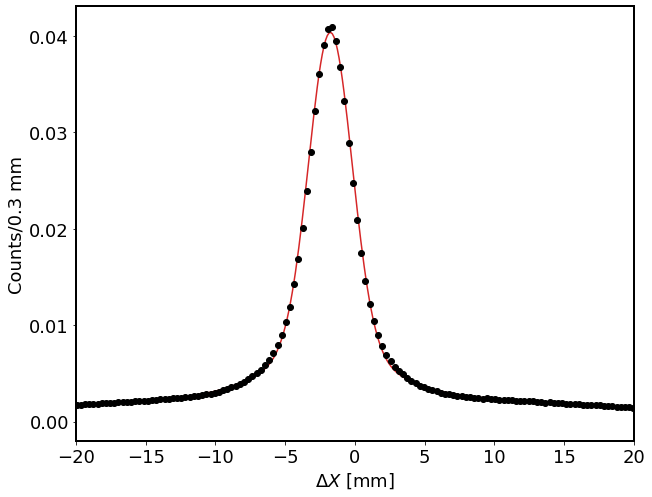

In [115]:
fig, ax= pl.subplots(figsize=(plotw,ploth))

nbins = 400
x_range = [-60, 60]

counts, bin_edges = np.histogram(dx, bins=nbins, range=(x_range[0], x_range[1]))
bin_centres = (bin_edges[:-1]+bin_edges[1:])/2.
err = np.sqrt(counts)
err = err/np.sum(counts)
counts = counts/np.sum(counts)
pl.errorbar(bin_centres, counts, yerr=err, fmt='o', color='black')


lower, upper = obs.limits
numpoint=1000
x_plot = np.linspace(lower[-1][0], upper[0][0], num=numpoint)
y_plot = zfit.run(model.pdf(x_plot, norm_range=obs))

pl.plot(x_plot, y_plot*numpoint/(nbins*np.sum(y_plot)), color='tab:red')

ax.set_xlim(-20, 20)
# ax.set_yscale('log')

ax.set_xlabel(r'$\Delta X$ [mm]', fontsize=textsize)
ax.set_ylabel(r'Counts/0.3 mm', fontsize=textsize)

In [118]:
print("Function minimum:", result.fmin)
print("Converged:", result.converged)
print(result)

Function minimum: -1733756.8030581838
Converged: True
FitResult of
<UnbinnedNLL model=[<zfit.<class 'zfit.models.functor.SumPDF'>  params=[Composed_autoparam_8, g_frac100, g_frac100]] data=[<zfit.core.data.Data object at 0x7fdcaab0dbb0>] constraints=[]> 
with
<Minuit Minuit tol=0.001>

╒═════════╤═════════════╤══════════════════╤═════════╤═════════════╕
│ valid   │ converged   │ param at limit   │ edm     │ min value   │
╞═════════╪═════════════╪══════════════════╪═════════╪═════════════╡
│ True    │ True        │ False            │ 6.5e-07 │ -1733757    │
╘═════════╧═════════════╧══════════════════╧═════════╧═════════════╛

Parameters
name         value  (rounded)    at limit
---------  ------------------  ----------
g_frac100            0.426067       False
mu100                -1.75991       False
sigma100              1.54453       False
mu101                -1.65533       False
sigma101              17.7883       False
mu103                -1.99178       False
sigma103            

In [43]:
result

FitResult of
<UnbinnedNLL model=[<zfit.<class 'zfit.models.functor.SumPDF'>  params=[Composed_autoparam_1, g_frac1]] data=[<zfit.core.data.Data object at 0x7fdcb0afb850>] constraints=[]> 
with
<Minuit Minuit tol=0.001>

╒═════════╤═════════════╤══════════════════╤═════════╤═════════════╕
│ valid   │ converged   │ param at limit   │ edm     │ min value   │
╞═════════╪═════════════╪══════════════════╪═════════╪═════════════╡
│ False   │ True        │ True             │ 0.00014 │ 979.9666    │
╘═════════╧═════════════╧══════════════════╧═════════╧═════════════╛

Parameters
name       value  (rounded)    at limit
-------  ------------------  ----------
g_frac1            0.222542       False
mu6                 9.99385       False
sigma6               4.6878       False
mu7                      10        True
sigma7              30.7482       False

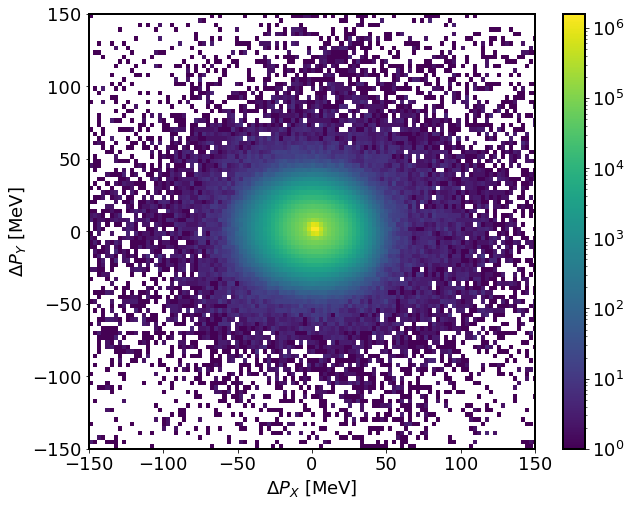

In [ ]:
# Vertex position vs GTK track position @ GTK3
fig, ax= pl.subplots(figsize=(plotw,ploth))

h = ax.hist2d(dPx, dPy, bins=[300, 300], cmap=colormap, norm=mcolors.LogNorm())
ax.set_xlabel(r'$\Delta P_X$ [MeV]', fontsize=textsize)
ax.set_ylabel(r'$\Delta P_Y$ [MeV]', fontsize=textsize)

ax.set_xlim(-150, 150)
ax.set_ylim(-150, 150)

pl.colorbar(h[3], ax=ax)  # show color scale

In [ ]:
# We also can open the file with uproot. Note it is not very happy because of std::vectors...
file = uproot.open(FilePath)

gtk_tree = file["GTKStudyTtree"]
gtk_tree.show()

In [ ]:
k3pi_df=gtk_tree.arrays(["K3piVertex_x", "K3piVertex_y", "K3piVertex_z", "K3piVertexGTK3_x","K3piVertexGTK3_y","K3piVertexGTK3_z",
                        "K3piTotalMomGTK3_Px", "K3piTotalMomGTK3_Py", "K3piTotalMomGTK3_Pz"], library="pd")

In [ ]:
k3pi_df.head()

In [ ]:
fig, ax= pl.subplots(figsize=(plotw, ploth))

pl.hist(0.001*k3pi_df["K3piVertex_z"], bins=150)
ax.set_xlabel(r'K3$\pi$ Z vertex [m]', fontsize=textsize)

ax.set_yscale('log')

ax.tick_params(axis='both',bottom=True, top=True, left=True, right=True, direction='in', which='both', width=2, length=5, labelsize=textsize, grid_color='black')

In [ ]:
# Vertex position
fig, ax= pl.subplots(figsize=(plotw,ploth))

h = ax.hist2d(k3pi_df['K3piVertex_x'], k3pi_df['K3piVertex_y'], bins=[300, 300], cmap=colormap, norm=mcolors.LogNorm())
ax.set_xlabel(r'K3$\pi_X$ [mm]', fontsize=textsize)
ax.set_ylabel(r'K3$\pi_Y$ [mm]', fontsize=textsize)

ax.set_xlim(-150, 200)
ax.set_ylim(-150, 150)

pl.colorbar(h[3], ax=ax)  # show color scale


In [ ]:
# Vertex position @GTK3
fig, ax= pl.subplots(figsize=(plotw,ploth))

h = ax.hist2d(k3pi_df['K3piVertexGTK3_x'], k3pi_df['K3piVertexGTK3_y'], bins=[300, 300], cmap=colormap, norm=mcolors.LogNorm())
ax.set_xlabel(r'K3$\pi_X$ [mm]', fontsize=textsize)
ax.set_ylabel(r'K3$\pi_Y$ [mm]', fontsize=textsize)

ax.set_xlim(-60, 50)
ax.set_ylim(-50, 50)

pl.colorbar(h[3], ax=ax)  # show color scale